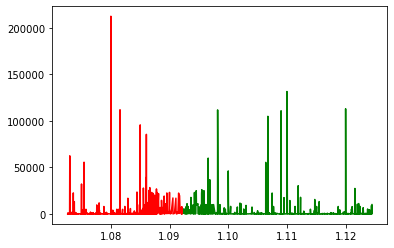

In [2]:
import marketData
import SupportResistance
import Plot

df = SupportResistance.OrderBook("ADAUSDT")
Plot.plotSR(df[0], df[1])